In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint
from scipy.stats import boxcox
import joblib

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import boxcox
from sklearn.metrics import r2_score
import joblib
import pandas as pd, numpy as np
import sys, os
import warnings
from sklearn.ensemble import VotingRegressor


if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

2024-04-14 17:48:07.061533: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 17:48:16.318958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [1]:
df = pd.read_csv("../data/csv/clean_V2.csv")

In [2]:
pd.set_option("display.max_columns", None)
df.sample(5)

,Price,Title,Number of USB 3.0 Ports,Brand,Series,Processor Brand,Item model number,Memory Technology,Hard Disk Description,Graphics Chipset Brand,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished,base_color,RAM_in_GB,Graphics_Coprocessor_Brand,OS_Name,MANU_Name,Graphics Storage (GB),Laptop_Type,ProcessorManufacturer,ProcessorSpeedGHz
7922,889.9900,"MSI Modern 14 A10M-460 14"" Ultra Thin and Ligh...",0,MSI,Modern 14 A10M-460,Intel,Modern 14 A10M-460,ddr4,SSD,Intel,14.1,1920.0,1080.0,1.190000,0,Carbon,8.0,Intel,Windows,Other,6,Laptop,Intel I5,3.0
3406,290.3840,(Renewed) Dell Latitude Intel 4th Gen Core i5 ...,2,Dell,Latitude,Intel,E7440-i5-8 GB-500 GB,ddr3,HDD,Intel,14.0,1366.0,768.0,2.000000,1,Silver,8.0,Intel,Windows,dell,8,Laptop,Intel I5,1.9
462,307.3464,"HP Newest 14in Schools and Business Laptop, In...",0,HP,HP,Intel,HP 14in,other,Other,Intel,14.0,1366.0,768.0,1.741793,0,White,16.0,Intel,Windows,hp,16,Laptop,Other,1.1
5310,531.0400,(Refurbished) HP Probook Laptop 450G3 Intel Co...,4,HP,450G3,Intel,450G3-i5-16-512,ddr4,SSD,Intel,15.6,1920.0,1080.0,2.700000,1,other,32.0,Intel,Windows,hp,32,Laptop,Intel I5,2.3
5167,505.4400,(Refurbished) Dell Latitude Laptop 5490 Intel ...,3,Dell,5490-i5-Touch,Intel,5490-i5-16-256-cr,ddr4,SSD,Intel,14.0,1920.0,1080.0,1.660000,1,other,16.0,Intel,Windows,dell,16,Laptop,Intel I5,2.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       8025 non-null   float64
 1   Title                       8025 non-null   object 
 2   Number of USB 3.0 Ports     8025 non-null   int64  
 3   Brand                       8025 non-null   object 
 4   Series                      8025 non-null   object 
 5   Processor Brand             8025 non-null   object 
 6   Item model number           8025 non-null   object 
 7   Memory Technology           8025 non-null   object 
 8   Hard Disk Description       8025 non-null   object 
 9   Graphics Chipset Brand      8025 non-null   object 
 10  DisplaySizeInches           8025 non-null   float64
 11  HorizontalPixels            8025 non-null   float64
 12  VerticalPixels              8025 non-null   float64
 13  WeightKg                    8025 

In [4]:
df.drop(columns=["Number of USB 3.0 Ports", "Series", "Item model number", "Graphics Chipset Brand", "MANU_Name"], inplace=True)

Let's round the Price Values to be in Integers by rounding the values.

In [5]:
df['Price'] = df['Price'].round().astype(int)

In [6]:
df['RAM_in_GB'] = df['RAM_in_GB'].astype(int)

In [7]:
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

(correlation_matrix)

,Price,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished,RAM_in_GB,Graphics Storage (GB),ProcessorSpeedGHz
Price,1.000000,0.193712,0.434750,0.355124,0.067253,-0.307461,0.081442,-0.011345,0.245062
DisplaySizeInches,0.193712,1.000000,0.094927,0.044229,0.007973,-0.178353,0.096739,0.003484,0.267284
HorizontalPixels,0.434750,0.094927,1.000000,0.785561,0.022546,-0.142768,0.045233,-0.069749,0.142456
VerticalPixels,0.355124,0.044229,0.785561,1.000000,0.020635,-0.030481,0.066526,-0.079954,0.098455
WeightKg,0.067253,0.007973,0.022546,0.020635,1.000000,0.091231,0.015284,0.012082,0.007368
Refurbished,-0.307461,-0.178353,-0.142768,-0.030481,0.091231,1.000000,-0.054379,-0.026253,-0.260694
RAM_in_GB,0.081442,0.096739,0.045233,0.066526,0.015284,-0.054379,1.000000,0.025012,0.069991
Graphics Storage (GB),-0.011345,0.003484,-0.069749,-0.079954,0.012082,-0.026253,0.025012,1.000000,-0.009394
ProcessorSpeedGHz,0.245062,0.267284,0.142456,0.098455,0.007368,-0.260694,0.069991,-0.009394,1.000000


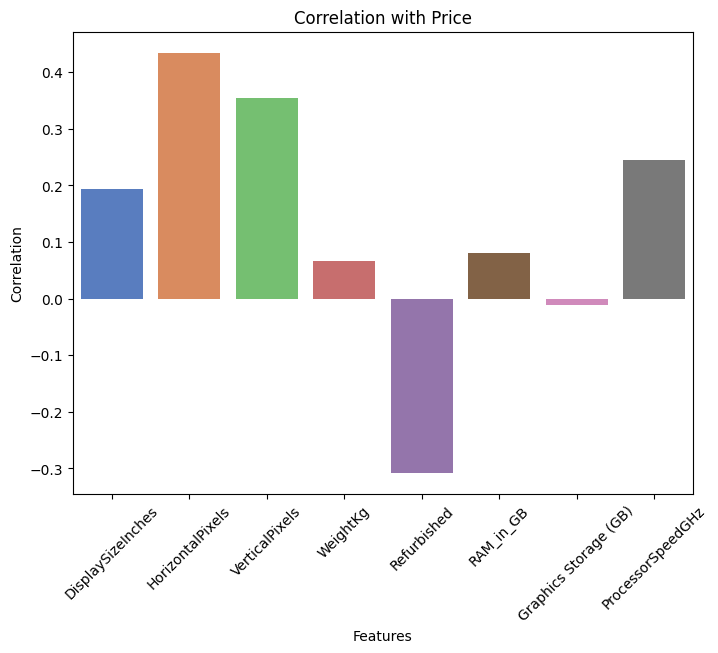

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number']).drop(columns=['Price'])

# Calculate correlation of numeric columns with respect to 'Price' column
correlation_with_price = numeric_columns.corrwith(df['Price'])

# Plot the correlation values
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette="muted")
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

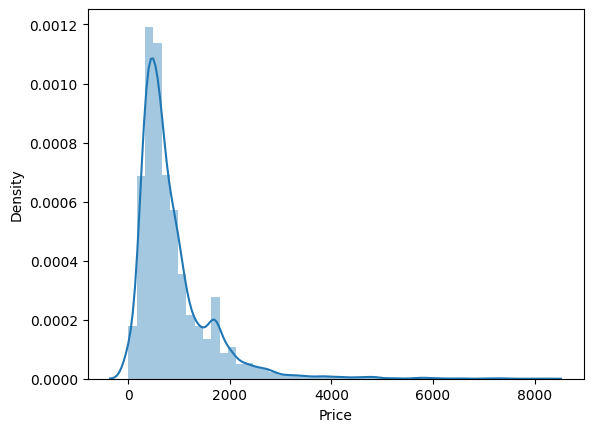

In [9]:
sns.distplot(df['Price'])

In [10]:
df["Brand"] = df["Brand"].str.capitalize()
values = df['Brand'].value_counts()

filtered_brands = values[values > 100].index
filtered_df = df[df['Brand'].isin(filtered_brands)]


<Axes: xlabel='Brand'>

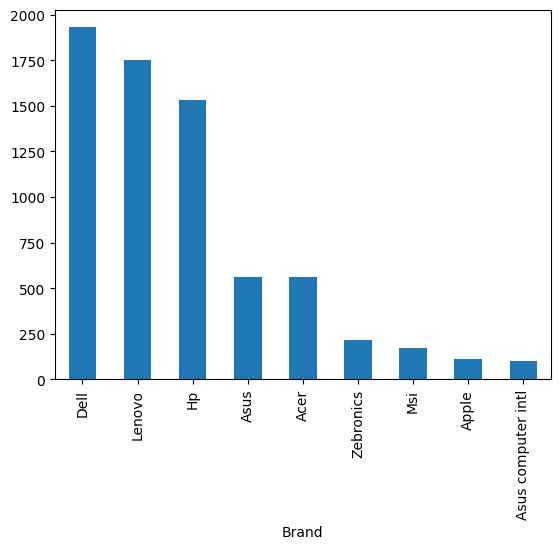

In [11]:
values = df['Brand'].value_counts()

filtered_values = values[values > 100]

filtered_values.plot(kind='bar')


In [12]:
df['Brand'] = df['Brand'].replace(['asus computer intl'], ['asus'] )

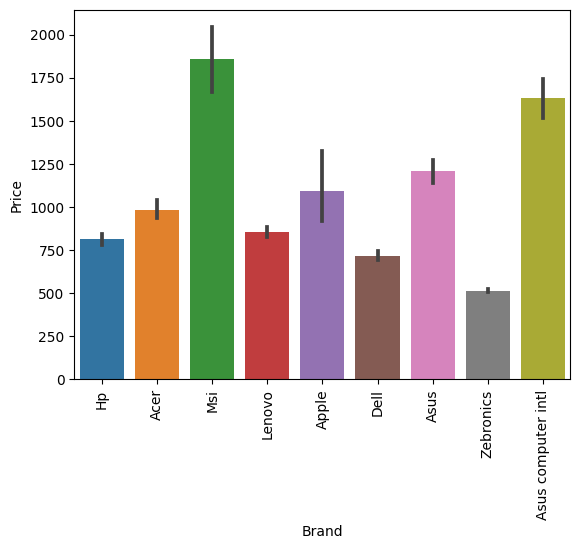

In [13]:
sns.barplot(x=filtered_df["Brand"],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Laptop_Type'>

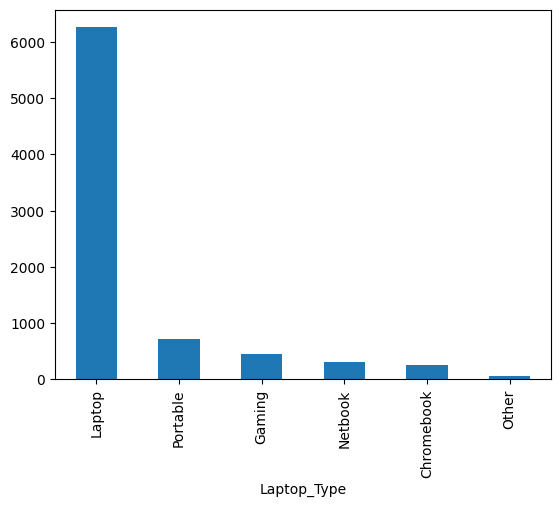

In [14]:
df['Laptop_Type'].value_counts().plot(kind='bar')

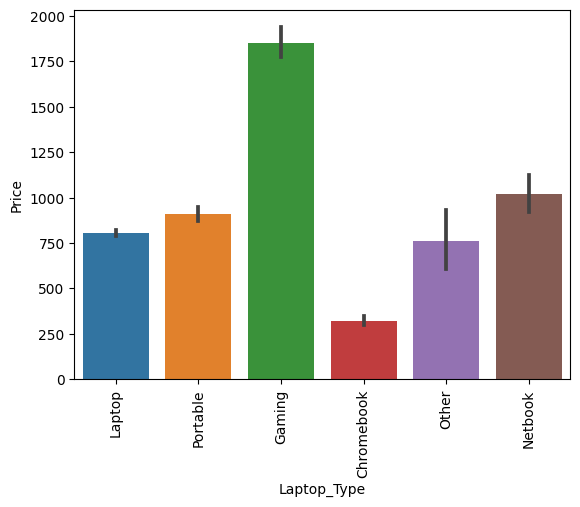

In [15]:
sns.barplot(x=df['Laptop_Type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='DisplaySizeInches', ylabel='Density'>

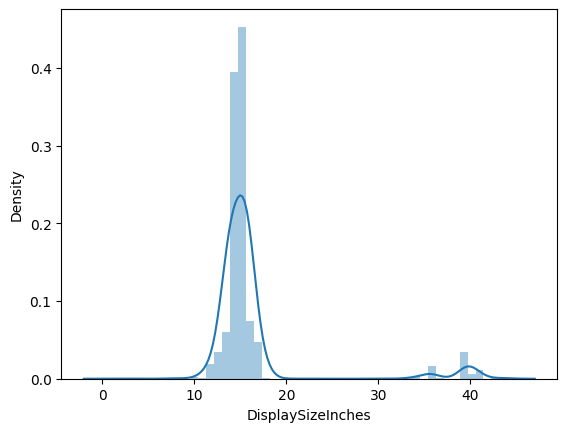

In [16]:
sns.distplot(df['DisplaySizeInches'])

<Axes: xlabel='DisplaySizeInches', ylabel='Price'>

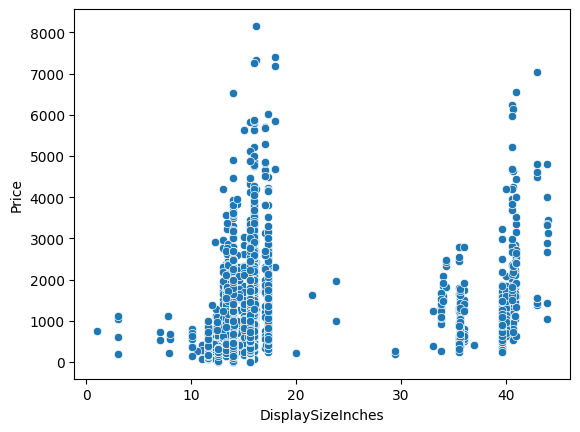

In [17]:
sns.scatterplot(x=df["DisplaySizeInches"],y=df['Price'])

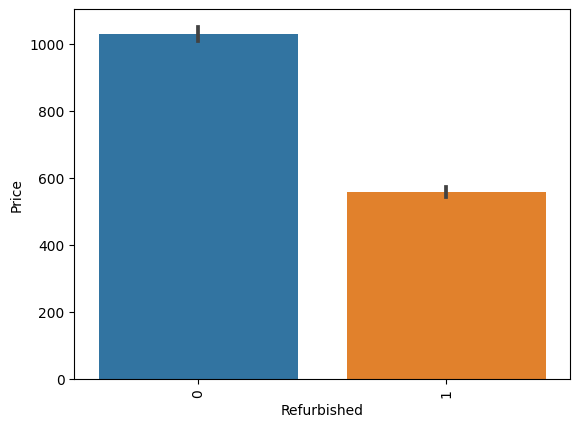

In [18]:
sns.barplot(x=df['Refurbished'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

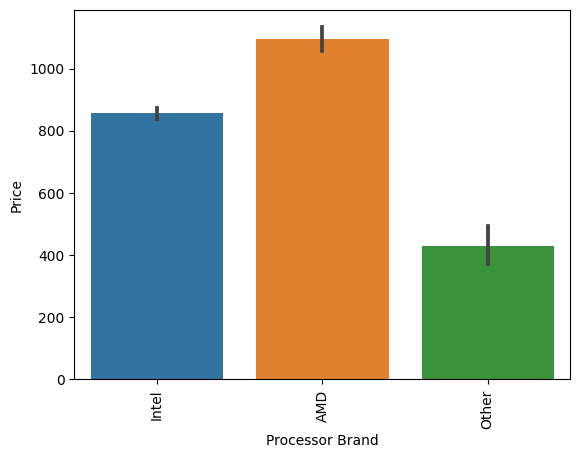

In [19]:
sns.barplot(x=df['Processor Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [20]:
# columns = ["Refurbished", "Processor Brand", "Laptop_Type", "Memory", "Graphics Chipset Brand", "Graphics_Coprocessor_Brand", "OS_Name", "MANU_Name"]

# fig, axes = plt.subplots(4, 2, figsize=(20, 6))

# for i, column in enumerate(columns):
#     print(column)
#     sns.barplot(x=df[column], y=df['Price'], ax=axes[i])
#     axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
#     axes[i].set_title(f'{column} vs Price')


# plt.tight_layout()
# plt.show()

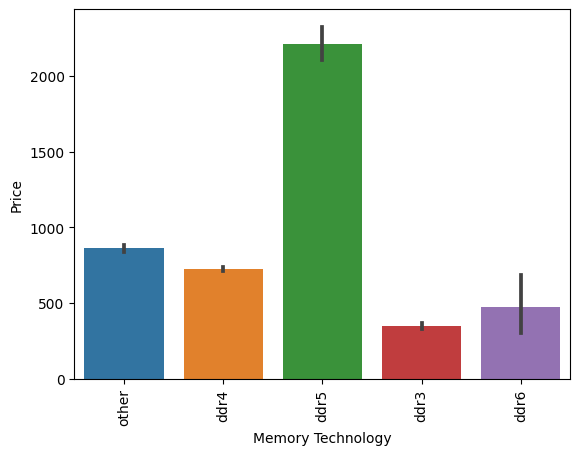

In [21]:
sns.barplot(x=df['Memory Technology'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [22]:
# df['Graphics Chipset Brand'] = df['Graphics Chipset Brand'].str.lower()

In [23]:
# df['Graphics Chipset Brand'].value_counts()

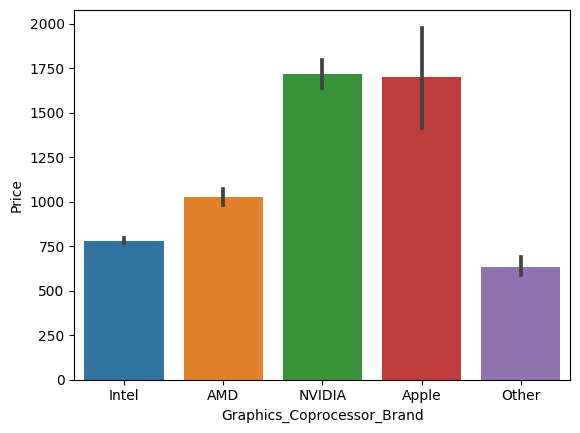

In [24]:
sns.barplot(x=df['Graphics_Coprocessor_Brand'],y=df['Price'])

plt.show()

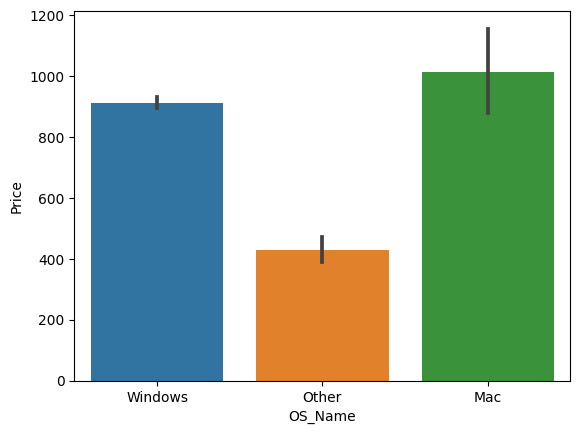

In [25]:
sns.barplot(x=df['OS_Name'],y=df['Price'])
plt.show()

In [26]:
# sns.barplot(x=df['MANU_Name'],y=df['Price'])
# plt.show()

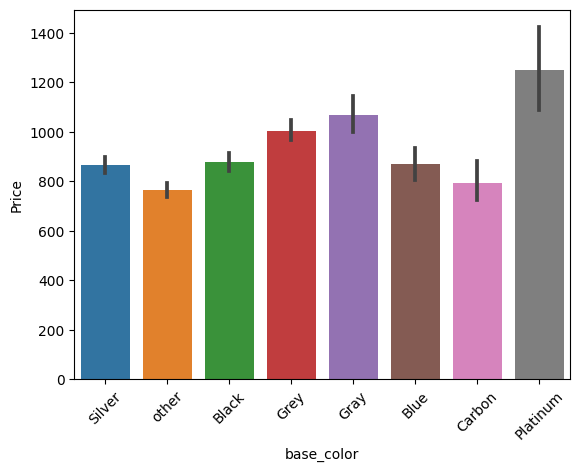

In [27]:
values = df['base_color'].value_counts()
filtered_ram = values[values > 80].index
filtered_df = df[df['base_color'].isin(filtered_ram)]

sns.barplot(x=filtered_df["base_color"], y=filtered_df['Price'])
plt.xticks(rotation=45)
plt.show()

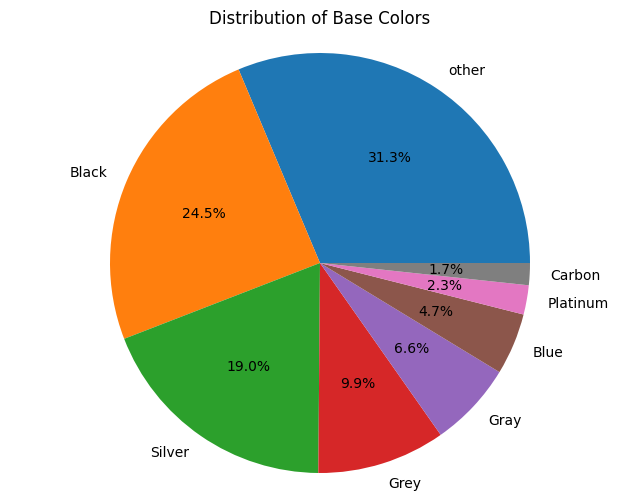

In [28]:
import matplotlib.pyplot as plt

# Get value counts for 'base_color' column
color_counts = df['base_color'].value_counts()

filtered_values = color_counts[color_counts > 80]


plt.figure(figsize=(8, 6))
plt.pie(filtered_values, labels=filtered_values.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Base Colors')
plt.show()

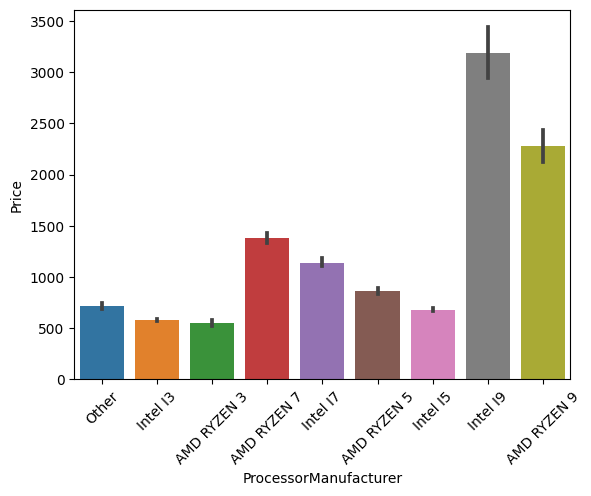

In [29]:
sns.barplot(x=df['ProcessorManufacturer'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

## Feature Engineering:

Pixels Per Inch:
Using Horizontal and Vertical Pixels we can calculate PPI.

PPI = √((Horizontal Pixels^2 + Vertical Pixels^2) / Diagonal Size^2)


In [30]:
df['PPI'] = (((df['HorizontalPixels']**2) + (df['VerticalPixels']**2))**0.5/df['DisplaySizeInches']).astype('float')

In [31]:
price_ppi_corr = df['Price'].corr(df['PPI'])

print("Correlation between Price and PPI:", price_ppi_corr)

Correlation between Price and PPI: 0.09941206548869247


<Axes: xlabel='RAM_in_GB'>

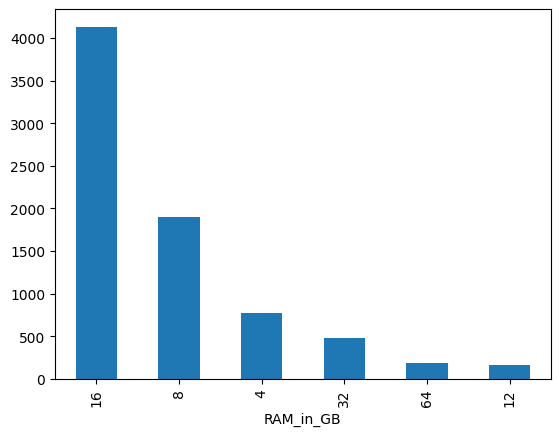

In [32]:
values = df['RAM_in_GB'].value_counts()

filtered_values = values[values > 100]
filtered_values.plot(kind='bar')

# df['RAM_in_GB'].value_counts().plot(kind='bar')

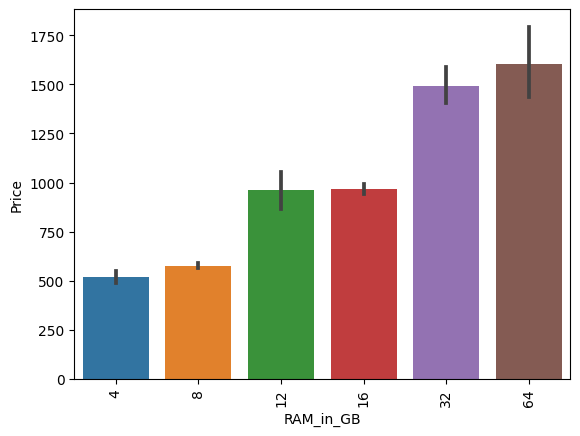

In [33]:
values = df['RAM_in_GB'].value_counts()
filtered_ram = values[values > 100].index
filtered_df = df[df['RAM_in_GB'].isin(filtered_ram)]

sns.barplot(x=filtered_df["RAM_in_GB"], y=filtered_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

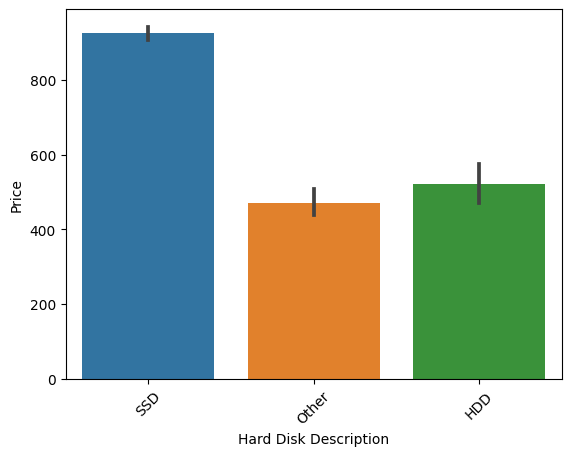

In [34]:
sns.barplot(x=df['Hard Disk Description'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

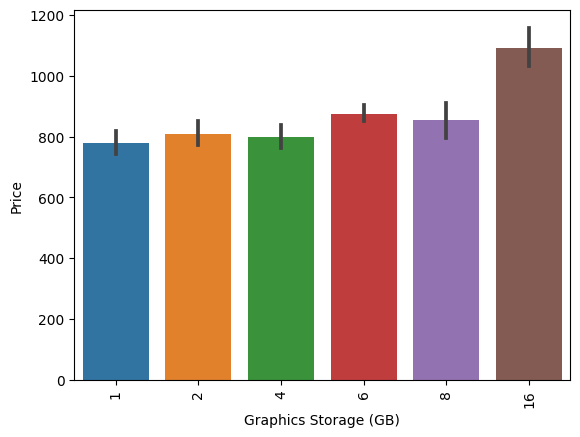

In [35]:
values = df['Graphics Storage (GB)'].value_counts()
filtered_ram = values[values > 200].index
filtered_df = df[df['Graphics Storage (GB)'].isin(filtered_ram)]

sns.barplot(x=filtered_df["Graphics Storage (GB)"], y=filtered_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
# sns.barplot(x=df["Number of USB 3.0 Ports"],y=df['Price'])
# plt.xticks(rotation=45)
# plt.show()

<Axes: xlabel='ProcessorSpeedGHz', ylabel='Density'>

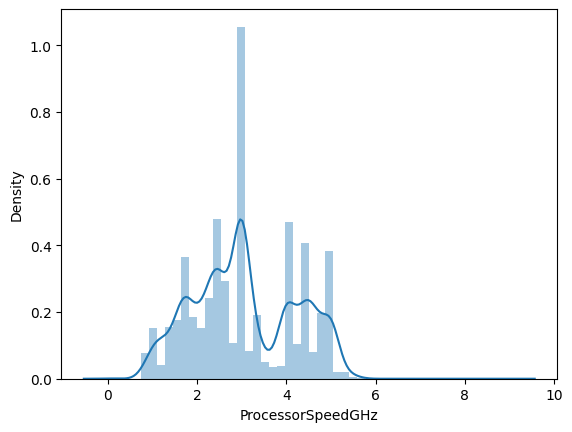

In [37]:
sns.distplot(df["ProcessorSpeedGHz"])

<Axes: xlabel='ProcessorSpeedGHz', ylabel='Price'>

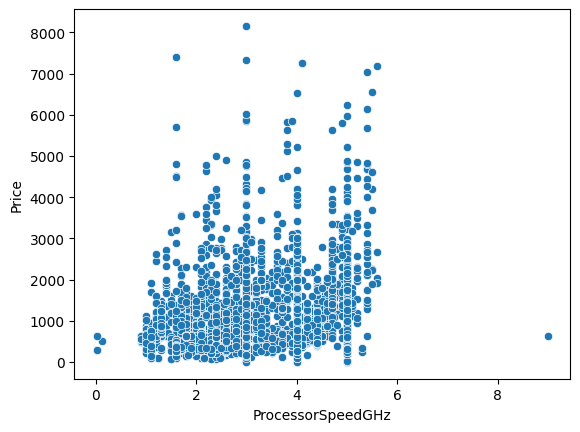

In [38]:
sns.scatterplot(x=df['ProcessorSpeedGHz'],y=df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

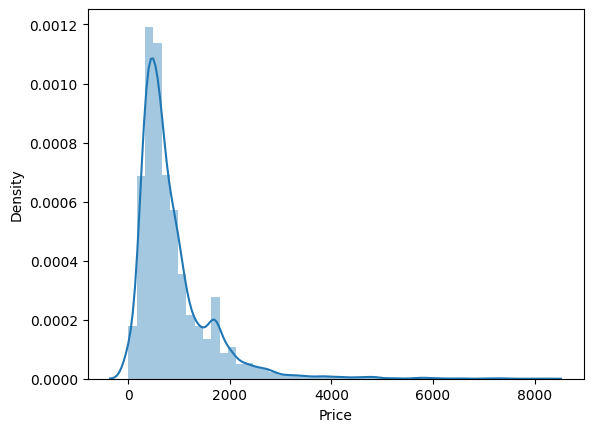

In [40]:
sns.distplot(df["Price"])

In [41]:
# sns.distplot((df['Price_BoxCox']))

In [42]:
# sns.distplot((df['Price_YeoJohnson']))

In [43]:
X = df.drop(columns=['Price', 'Title'])
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 19)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 19)

print("X Train Shape:", X_train.shape)
print("X Val Shape:", X_val.shape)
print("X Test Shape:", X_test.shape)

X Train Shape: (5617, 18)
X Val Shape: (1204, 18)
X Test Shape: (1204, 18)


In [37]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [36]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

# Create pipelines for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

# Fit and evaluate each pipeline
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print('R2 score:', r2_score(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print("\n")

Model: Linear Regression
R2 score: 0.7479973203776376
MAE: 2.056393134817827


Model: Ridge Regression
R2 score: 0.7471687738894961
MAE: 2.0762836021946707


Model: Lasso Regression
R2 score: 0.1735925221493786
MAE: 3.8861919675319343




KeyboardInterrupt: 

In [25]:
df = pd.read_csv("../data/csv/final.csv")

<Axes: ylabel='Density'>

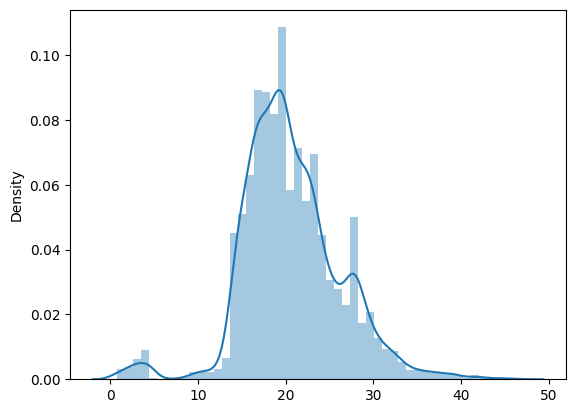

In [27]:
from scipy.stats import boxcox
import seaborn as sns
y_transformed, lambda_value = boxcox(df['Price'])
sns.distplot((y_transformed))

In [28]:
# Splitting the data into features (X) and transformed target variable (y)
X = df.drop(columns=['Price', 'Title'])

# Ensure y is reshaped to a column vector
y_transformed = y_transformed.reshape(-1, 1)

# Splitting the transformed data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_transformed, test_size=0.3, random_state=19)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=19)

In [38]:
# Define models with their respective hyperparameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
    'Random Forest': (RandomForestRegressor(), {'regressor__n_estimators': [50, 100, 200]})
}

# Create pipelines for each model
pipelines = {}
for name, (model, params) in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipelines[name] = (pipeline, params)

# Fit and evaluate each pipeline
for name, (pipeline, params) in pipelines.items():
    grid_search = GridSearchCV(pipeline, params, scoring='neg_mean_absolute_error', cv=5, verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    print(f"Model: {name}")
    print('R2 score:', r2_score(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print("\n")

Model: Linear Regression
Best Parameters: {}
Best Negative MAE: -2.1214519200679804
R2 score: 0.7281249001334553
MAE: 2.090443266399385


Model: Ridge Regression
Best Parameters: {'regressor__alpha': 0.1}
Best Negative MAE: -2.051942684722066
R2 score: 0.7483613387751744
MAE: 2.063206675002173


Model: Lasso Regression
Best Parameters: {'regressor__alpha': 0.1}
Best Negative MAE: -2.802722335100058
R2 score: 0.5581852182924851
MAE: 2.8644993528509928




KeyboardInterrupt: 

In [90]:
df = pd.read_csv("../data/csv/final.csv")

In [31]:
# # Load the dataset
# df = pd.read_csv("../data/csv/final.csv")

# y_transformed, lambda_value = boxcox(df['Price'])

# # Splitting the data into features (X) and transformed target variable (y)
# X = df.drop(columns=['Price', 'Title'])

# # Ensure y is reshaped to a column vector
# y_transformed = y_transformed.reshape(-1, 1)

# # Split the data into training and testing sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y_transformed, test_size=0.3, random_state=19)

# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=19)

# # Define preprocessing steps for numerical and categorical features
# numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = X.select_dtypes(include=['object']).columns

# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

In [11]:
# Create Random Forest pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Define hyperparameter grid for Random Forest
param_distributions = {
    'regressor__n_estimators': [int(x) for x in np.linspace(start=100, stop=200, num=10)],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [20, 40, 60, 80, None],
    'regressor__min_samples_split': randint(2, 15),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__bootstrap': [True, False]
}

# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)

# Best estimator
best_estimator_rf = random_search_rf.best_estimator_

# Save the best estimator
joblib.dump(best_estimator_rf, 'best_random_forest_model.pkl')

print("Successful!")

y_val_pred = best_estimator_rf.predict(X_val)

# Evaluation
print('R2 score:', r2_score(y_val, y_val_pred))
print('MAE:', mean_absolute_error(y_val, y_val_pred))


Successful!
Best Parameters: {'regressor__bootstrap': False, 'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 122}
Best Negative MAE: -1.1537978710654897
R2 score: 0.8802444594497533
MAE: 1.0675447565915175


In [20]:
# Create XGBoost pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Define hyperparameter grid for XGBoost
param_distributions = {
    'regressor__n_estimators': [int(x) for x in np.linspace(start=100, stop=200, num=10)],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'regressor__max_depth': [3, 4, 5, 6, 8, 10],
    'regressor__subsample': [0.5, 0.7, 0.9, 1.0],
    'regressor__colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'regressor__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'regressor__reg_alpha': [0, 0.01, 0.1, 1, 10, 100],
    'regressor__reg_lambda': [0, 0.01, 0.1, 1, 10, 100]
}

# Perform RandomizedSearchCV
random_search_xg = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search_xg.fit(X_train, y_train)

# Best estimator
best_estimator_xg = random_search_xg.best_estimator_

# Save the best estimator
joblib.dump(best_estimator_xg, 'best_xgboost_model.pkl')

print("Successful!")

y_val_pred = best_estimator_xg.predict(X_val)

# Evaluation
print('Best Parameters:', random_search_xg.best_params_)

print('R2 score:', r2_score(y_val, y_val_pred))
print('MAE:', mean_absolute_error(y_val, y_val_pred))

Successful!
Best Parameters: {'regressor__subsample': 0.9, 'regressor__reg_lambda': 0, 'regressor__reg_alpha': 1, 'regressor__n_estimators': 133, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.1, 'regressor__gamma': 0.1, 'regressor__colsample_bytree': 0.9}
Best Negative MAE: -1.178596416346728
R2 score: 0.8676043488703737
MAE: 1.1222055550597285


In [18]:
# Create GradientBoostingRegressor pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Define hyperparameter grid for GradientBoostingRegressor
gb_param_distributions = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'regressor__max_depth': [3, 4, 5, 6, 8, 10],
    'regressor__subsample': [0.5, 0.7, 0.9, 1.0],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None]
}

# Perform RandomizedSearchCV for GradientBoostingRegressor
gb_random_search = RandomizedSearchCV(
    gb_pipeline,
    param_distributions=gb_param_distributions,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

gb_random_search.fit(X_train, y_train)

# Best estimator
gb_best_estimator = gb_random_search.best_estimator_

# Save the best GradientBoostingRegressor estimator
joblib.dump(gb_best_estimator, 'best_gradient_boosting_model.pkl')

print("Successful!")

y_val_pred = gb_best_estimator.predict(X_val)

# Evaluation
print('Best Parameters:', gb_random_search.best_params_)
print('R2 score:', r2_score(y_val, y_val_pred))
print('MAE:', mean_absolute_error(y_val, y_val_pred))

Successful!
Best Parameters: {'regressor__subsample': 1.0, 'regressor__n_estimators': 500, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_features': None, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.3}
Best Negative MAE: -1.2024432800928317
R2 score: 0.8378325907349313
MAE: 1.1817823305902269


In [10]:
from sklearn.ensemble import ExtraTreesRegressor

# Create ExtraTreesRegressor pipeline
extra_trees_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor())
])

# Define hyperparameter grid for ExtraTreesRegressor
extra_trees_param_distributions = {
    'regressor__n_estimators': [int(x) for x in np.linspace(start=100, stop=200, num=10)],
    'regressor__max_depth': [None, 3, 5, 7, 9],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None]
}

# Perform RandomizedSearchCV for ExtraTreesRegressor
extra_trees_random_search = RandomizedSearchCV(
    extra_trees_pipeline,
    param_distributions=extra_trees_param_distributions,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

extra_trees_random_search.fit(X_train, y_train)

# Best estimator
best_estimator_extra_trees = extra_trees_random_search.best_estimator_

# Save the best estimator
joblib.dump(best_estimator_extra_trees, 'best_extra_trees_model.pkl')

print("Successful!")

y_val_pred = best_estimator_extra_trees.predict(X_val)

# Evaluation
print('Best Parameters:', extra_trees_random_search.best_params_)
print('Best Negative MAE:', extra_trees_random_search.best_score_)
print('R2 score:', r2_score(y_val, y_val_pred))
print('MAE:', mean_absolute_error(y_val, y_val_pred))

Successful!
Best Parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': None, 'regressor__max_depth': None, 'regressor__bootstrap': True}
Best Negative MAE: -1.2032481925555647
R2 score: 0.8761990114620002
MAE: 1.0848916369534973


In [21]:
from sklearn.ensemble import VotingRegressor

# Define the estimators with their best parameters
estimators = [
    ('extra_trees', best_estimator_extra_trees),
    ('gradient_boosting', gb_best_estimator),
    ('xgboost', best_estimator_xg),
    ('random_forest', best_estimator_rf)
]

# Create the VotingRegressor
voting_regressor = VotingRegressor(estimators)

# Fit the VotingRegressor on the training data
voting_regressor.fit(X_train, y_train)

# Save the voting regressor
joblib.dump(voting_regressor, 'voting_regressor_model.pkl')

print("Voting Regressor trained and saved successfully!")

y_val_pred = voting_regressor.predict(X_val)

# Evaluation
print('R2 score:', r2_score(y_val, y_val_pred))
print('MAE:', mean_absolute_error(y_val, y_val_pred))


Voting Regressor trained and saved successfully!
R2 score: 0.8823873232929063
MAE: 1.0444643188049825


In [185]:
df.to_csv("../data/csv/final_model_data.csv", index=False)

In [261]:
# Load the dataset
df = pd.read_csv("../data/csv/final.csv")

df['Total_RAM_Storage'] = df['RAM_in_GB'] + df['Graphics Storage (GB)']
df['Weight_by_Screen_Size'] = df['WeightKg'] / df['DisplaySizeInches']

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['Price', 'Title'])
y = df['Price']

In [262]:
# Apply Box-Cox transformation to the target variable
y_transformed, lambda_value = boxcox(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.3, random_state=19)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [263]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [264]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [271]:
# Define the deep learning model with increased complexity
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [272]:
# Create a pipeline to include preprocessing and modeling steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['DisplaySizeInches', 'HorizontalPixels', 'VerticalPixels', 'WeightKg',
       'Refurbished', 'RAM_in_GB', 'Graphics Storage (GB)',
       'ProcessorSpeedGHz', 'PPI', 'Total_RAM_Storage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Brand', 'Processor Brand', 'Memory Technology',
       'Hard Disk Description', 'base_color', 'Graphics_Coprocessor_Brand',
       'OS_Name', 'Laptop_Type', 'ProcessorManufacturer'],
      dtype='object'))])),
                ('model', <Sequential name=sequential_236, built=True>)])

In [273]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the pipeline
pipeline.fit(X_train, y_train, model__callbacks=[early_stopping], model__epochs=200, model__batch_size=10, model__validation_split=0.2)


Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 94.6833 - val_loss: 12.5312
Epoch 2/200
 54/450 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 33.3902

KeyboardInterrupt: 

In [274]:
# Evaluate the pipeline
# Preprocess X_test explicitly
X_test_preprocessed = pipeline['preprocessor'].transform(X_test)

# Evaluate the model
mse = pipeline['model'].evaluate(X_test_preprocessed, y_test)
print("Mean Squared Error on Test Data:", mse)

# Predict on X_test
y_pred = pipeline['model'].predict(X_test_preprocessed)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score on Test Data:", r2)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.7605
Mean Squared Error on Test Data: 11.898682594299316
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R2 Score on Test Data: 0.6273710256956577
